# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: 

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [2]:
# TODO: Import dataset and inspect the first five columns

# Read the dataset with specific column names
column_names = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'label']
df = pd.read_csv("seeds_dataset.txt", delimiter='\t', header=None, names=column_names)

# Display the first few rows of the dataframe
df.head()

,f1,f2,f3,f4,f5,f6,f7,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [3]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y

# Set column 7 as the target variable (y)
y = df["label"]

# Set the rest of the columns as features (X)
X = df.drop(columns=["label"])

# Print the shape of X and y
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

To scale this data, I am going to use Standard Scaler. It ensures that the data has a mean of 0 and a standard deviation of 1, aligning with assumptions of normal distribution for certain algorithms. PCA, relying on eigenvalue decomposition, benefits from centered data and distance-based clustering algorithms such as k-means perform well with standardized features.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [4]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# TODO: Print the shape of the training feature matrix and target vector
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (168, 7)
Shape of y_train: (168,)


Now that we have our training data, we can implement our selected scaler.

In [6]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [7]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [8]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [9]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Instantiate the grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and scores
print("Best Parameters: ", grid_search.best_params_)
print("Cross-Validation Score: ", grid_search.best_score_)
print("Test Score: ", grid_search.score(X_test_scaled, y_test))

Best Parameters:  {'C': 10.0, 'fit_intercept': True}
Cross-Validation Score:  0.9467023172905525
Test Score:  0.9523809523809523


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [10]:
# TODO: Predict y labels using best estimator

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

y_pred = grid_search.best_estimator_.predict(X_test_scaled)

In [45]:
# TODO: Reduce dimensions of test data for plotting

pca = PCA()
X_test_pca = pca.fit_transform(X_test_scaled)

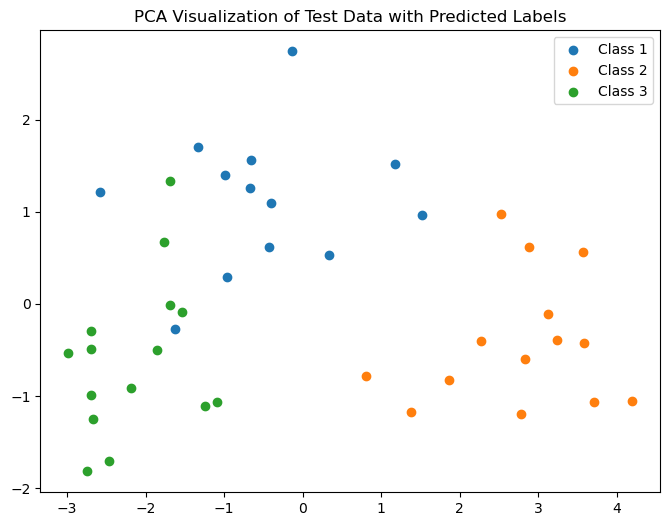

In [46]:
# TODO: Plot test points colored by predicted label

plt.figure(figsize=(8, 6))

for label in set(y_pred):
    plt.scatter(X_test_pca[y_pred == label, 0], X_test_pca[y_pred == label, 1], label=f'Class {label}')

plt.title('PCA Visualization of Test Data with Predicted Labels')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*

The model demonstrated strong performance, with high accuracy scores on both the training and testing datasets. The minimal difference between the training and testing scores suggests a balanced model with low bias and low variance.

2. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

PCA and logistic regression worked well, implying that the dataset is likely linear. The clear grouping of predicted labels supports this idea. The success of linear models suggests that the data's relationships can be adequately captured with linear techniques.


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

1. I sourced my code using the examples provided in D2L from worksheets such as Introduction to Clustering, Scaling and more. I also used the code from Lab 8 as well. 
2. I completed these steps by the order it was given on the worksheet, which gave a good direction to what I had to do.
3. No generative AI was used for the code at all. I used it for it to explain some of the concepts such as clustering and how to interpret the visualization.
4. I didn't run into any troubles or challenges for this; I think what helped me to be successful was applying the previous concepts and knowledge from previous assignments and examples - since there is usually a flow to follow, I was able to pick it up quite easily for this assignment.

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [13]:
# TODO: Scale feature matrix
column_names = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'label']
df = pd.read_csv("seeds_dataset.txt", delimiter='\t', header=None, names=column_names)
X = df.drop(columns=["label"])

from sklearn.preprocessing import StandardScaler

# Scale the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a new DataFrame with the scaled data
df_scaled = pd.DataFrame(data=X_scaled, columns=column_names[:-1])

# Print the first few rows of the scaled DataFrame
print(df_scaled.head())


         f1        f2        f3        f4        f5        f6        f7
0  0.142098  0.215462  0.000061  0.304218  0.141702 -0.986152 -0.383577
1  0.011188  0.008224  0.428515 -0.168625  0.197432 -1.788166 -0.922013
2 -0.192067 -0.360201  1.442383 -0.763637  0.208048 -0.667479 -1.189192
3 -0.347091 -0.475333  1.039381 -0.688978  0.319508 -0.960818 -1.229983
4  0.445257  0.330595  1.374509  0.066666  0.805159 -1.563495 -0.475356


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

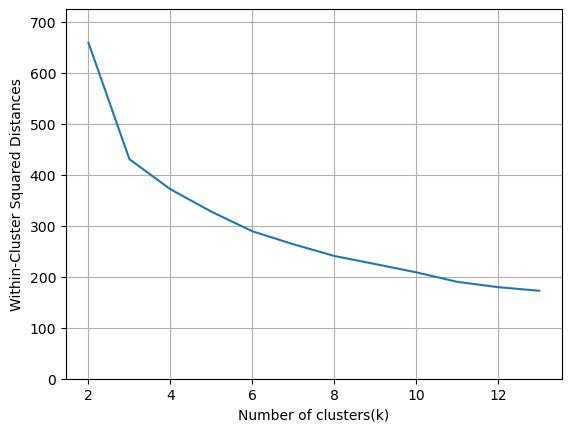

In [14]:
# TODO: Use the elbow method to determine the optimal number of clusters

from sklearn.cluster import KMeans

inertia = []
for n_clusters in range(2, 14):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10).fit(X_scaled)
    inertia.append(kmeans.inertia_ )
    
inertias = pd.DataFrame({'n_clusters': range(2, 14), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [29]:
# TODO: Implement K-means with the number of clusters determined in the previous step

num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)

# Fit the KMeans model to the scaled data
kmeans.fit_predict(X_scaled)
df_scaled['cluster_label'] = kmeans.fit_predict(X_scaled)

df_scaled.head()

C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,f1,f2,f3,f4,f5,f6,f7,cluster_label
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577,2
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013,2
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192,2
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983,2
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356,2


In [30]:
# TODO: Calculate the three different validation metrics

from sklearn import metrics

# Calculate Silhouette score
silhouette_score = metrics.silhouette_score(X_scaled, df_scaled['cluster_label'])
print(f"Silhouette Score: {silhouette_score}")

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(X_scaled, df_scaled['cluster_label'])
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")

# Calculate Davies-Bouldin score
davies_bouldin_score = metrics.davies_bouldin_score(X_scaled, df_scaled['cluster_label'])
print(f"Davies-Bouldin Score: {davies_bouldin_score}")

Silhouette Score: 0.40072705527512986
Calinski-Harabasz Score: 249.7841749161647
Davies-Bouldin Score: 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

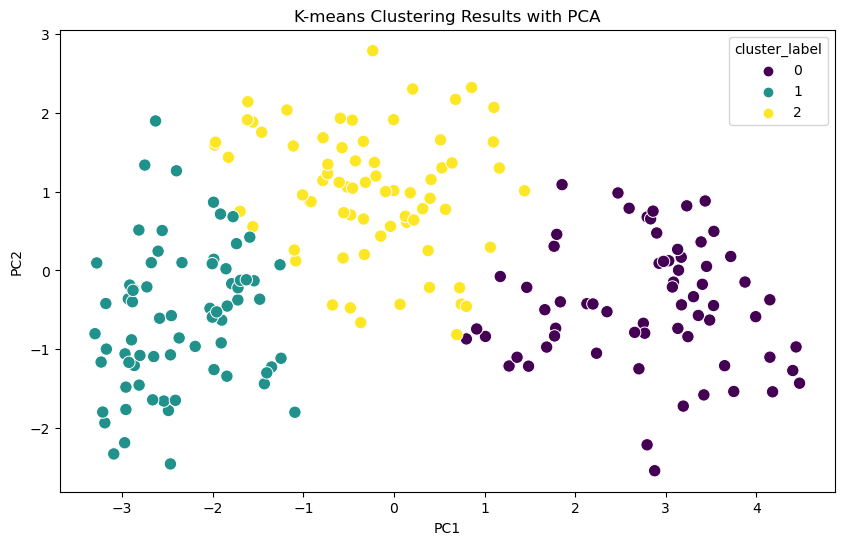

In [33]:
# TODO: Plot clustering results

# Apply PCA to reduce dimensionality
pca = PCA()
pca.fit(df_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

# Combine PCA results with cluster labels
df_pca['cluster_label'] = df['cluster_label']

# Plot clustering results using PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='cluster_label', data=df_pca, palette='viridis', s=80)
plt.title('K-means Clustering Results with PCA')
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [49]:
# TODO: Find the number of principal components using explained variance ratio
pca = PCA()
pca.fit(X_scaled)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
variance_threshold = 0.95
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f'Number of components for {variance_threshold * 100}% variance in X_scaled: {num_components}')

pca = PCA()
pca.fit(X)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
variance_threshold = 0.95
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f'Number of components for {variance_threshold * 100}% variance in X: {num_components}')

Number of components for 95.0% variance in X_scaled: 3
Number of components for 95.0% variance in X: 2


Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [55]:
# TODO: Use PCA to transform the data

num_components = 2
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)

C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ericy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


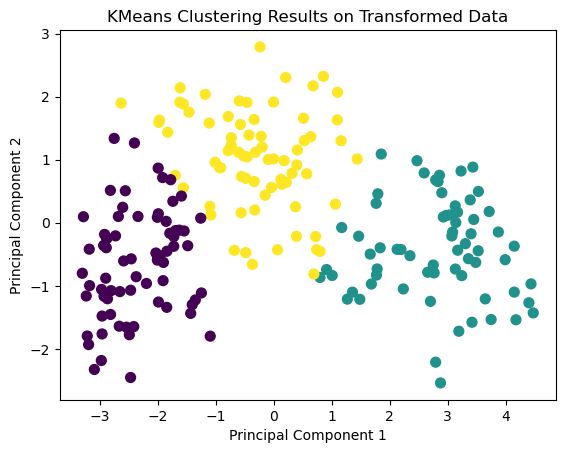

In [56]:
# TODO: Implement K-means with the transformed data

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

# Visualize the clustering results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('KMeans Clustering Results on Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [57]:
# TODO: Calculate the three different validation metrics

# Calculate Silhouette score
silhouette_score = metrics.silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_score}")

# Calculate Calinski-Harabasz score
calinski_harabasz_score = metrics.calinski_harabasz_score(X_pca, cluster_labels)
print(f"Calinski-Harabasz Score: {calinski_harabasz_score}")

# Calculate Davies-Bouldin score
davies_bouldin_score = metrics.davies_bouldin_score(X_pca, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin_score}")

Silhouette Score: 0.4934304869603191
Calinski-Harabasz Score: 397.30107838636786
Davies-Bouldin Score: 0.7066734757979803


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [58]:
# TODO: Display results

# Scores for original data
silhouette_score_original = metrics.silhouette_score(X_scaled, df_scaled['cluster_label'])
calinski_harabasz_score_original = metrics.calinski_harabasz_score(X_scaled, df_scaled['cluster_label'])
davies_bouldin_score_original = metrics.davies_bouldin_score(X_scaled, df_scaled['cluster_label'])

# Scores for PCA-transformed data
silhouette_score_pca = metrics.silhouette_score(X_pca, cluster_labels)
calinski_harabasz_score_pca = metrics.calinski_harabasz_score(X_pca, cluster_labels)
davies_bouldin_score_pca = metrics.davies_bouldin_score(X_pca, cluster_labels)

results_df = pd.DataFrame({
    'Metric': ['Silhouette Score', 'Calinski-Harabasz Score', 'Davies-Bouldin Score'],
    'Original Data': [silhouette_score_original, calinski_harabasz_score_original, davies_bouldin_score_original],
    'PCA-Transformed Data': [silhouette_score_pca, calinski_harabasz_score_pca, davies_bouldin_score_pca]
})

print(results_df)

                    Metric  Original Data  PCA-Transformed Data
0         Silhouette Score       0.400727              0.493430
1  Calinski-Harabasz Score     249.784175            397.301078
2     Davies-Bouldin Score       0.927871              0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. The initial dataset was initially labeled into three classes, aligning with the selection of three clusters as the optimal number.
2. Indeed, the plots exhibit comparable distributions across the three classes.
3. To capture at least 95% of the variance, I opted for a two-component PCA. The results improved with PCA, with better scores for Silhouette, Calinski and Davies. This is a common outcome as a result of the curse of dimensionality, where reducing features often enhances clustering accuracy.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
I sourced my code using D2L example Kmeans examples and Finding_k, as well as the lab 8 code.
1. In what order did you complete the steps?
I completed the code using the order provided in this worksheet. It was a little confusing doing the transformation of PCA after, but was able to figure out what the question was asking.
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
I did use generative AI but not to code. I used it to ask how to interpret the three methods of scores, so that I can understand better what my results were showing. 
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?
I did find it quite challenging understanding the difference between the first part of 2 and the second part, separating the PCA transformation and non-PCA transformation. 

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.

I liked how this assignment included both supervised and non-supervised machine learning so you can directly compare the processes to follow and differences of results for both. It gives perspective on how to implement both for a single dataset which was intriguing. 

It was a little challenging following part 2 of the assignment using PCA because it was unclear about the transformation of PCA and I was stuck doing it for both parts, however was able to understand to just use .fit() instead. I was also having trouble understanding what the difference between the two parts were, however was able to figure out that the first part of 2 switched the order of the kmeans clustering from non-PCA transformed to PCA-transformed data. Overall, this assignment was a little challenging and took me more time to understand. 